<a href="https://colab.research.google.com/github/vg11072001/Machine-Learning/blob/main/projects/tensorflow_vs_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
 import tensorflow as tf

In [38]:
tf.__version__

'2.9.2'

## Tensorflow

In [43]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our fuction"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    # Training loop
    for i in range(0, 500):
        # print("Iteration %d" % i)
        # Run a single trainig step
        curr_loss, curr_exp, _ = sess.run([loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        
        # print("loss = %s" % curr_loss)
        # print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)

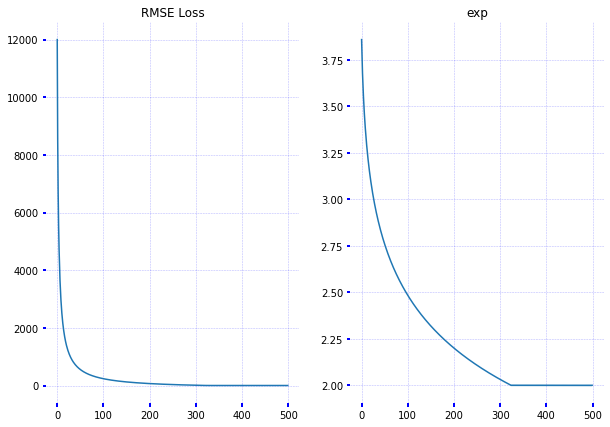

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(loss_history, exp_history):
    fig = plt.figure(figsize=(10, 7))
    fig.add_axes()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='2')
        
    ax1.set_title('RMSE Loss')
    ax2.set_title('exp')
    ax1.plot(np.arange(len(loss_history)), loss_history)
    ax2.plot(np.arange(len(exp_history)), exp_history)
    
plot_results(loss_history, exp_history)

## Pytorch

In [45]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2).sum()))

def forward(x, e):
    """Forward pass for our function"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-6

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)

# Model parameter and it's true value
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)
y = forward(x, exp)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 200):
    # print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data)
    exp_history.append(y_hat.data[0])
    
    # Compute gradients
    loss.backward()
    
    # print("loss = %s" % loss.data)
    # print("exp = %s" % exp_hat.data[0])
    
    # Update model parameters
    exp_hat.data -= learning_rate * exp_hat.grad.data
    exp_hat.grad.data.zero_()

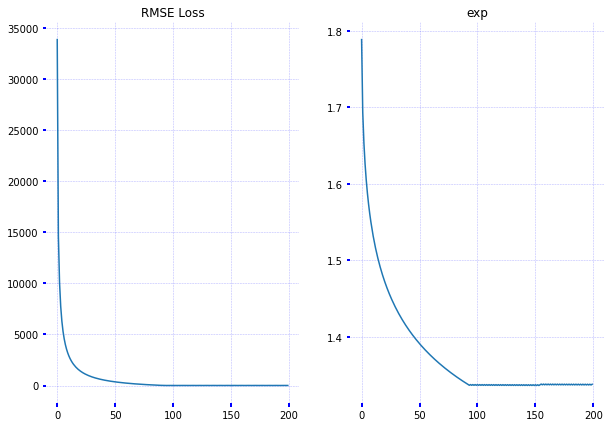

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(loss_history, exp_history):
    fig = plt.figure(figsize=(10, 7))
    fig.add_axes()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='2')
        
    ax1.set_title('RMSE Loss')
    ax2.set_title('exp')
    ax1.plot(np.arange(len(loss_history)), loss_history)
    ax2.plot(np.arange(len(exp_history)), exp_history)
    
plot_results(loss_history, exp_history)